### Importando as bibliotecas

In [2]:
!pip install xgboost

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

### Importando a base de dados

In [4]:
boston_dataset = sklearn.datasets.load_boston()
print(boston_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

### Carregando a base de dados em um DataFrame

In [6]:
preco_casa_dataframe = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
preco_casa_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Adicionando os preços a base de dados

In [7]:
preco_casa_dataframe['PRICE'] = boston_dataset.target
preco_casa_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Checando o  número de linhas e colunas na base de dados

In [8]:
preco_casa_dataframe.shape

(506, 14)

#### Checando se todas as linhas estão completamente preenchidas

In [10]:
preco_casa_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

#### Medidas estatisticas da base de dados

In [11]:
preco_casa_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Entendendo a correlação que existe entre as informações da base de dados

In [12]:
correlacao = preco_casa_dataframe.corr()

<AxesSubplot:>

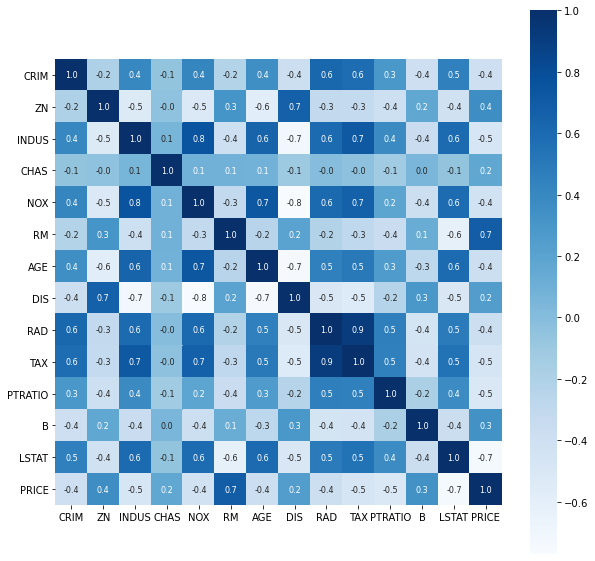

In [13]:
# Vamos usar um mapa de calor para entender a correlação entre as colunas
plt.figure(figsize=(10, 10))
sns.heatmap(correlacao, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8 }, cmap='Blues')

### Dividindo os dados em dados de treino e dados de teste

In [16]:
X = preco_casa_dataframe.drop('PRICE', axis=1)
Y = preco_casa_dataframe['PRICE']

In [17]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


### Treinando o modelo

In [21]:
# Carregando o modelo
modelo = XGBRegressor()

In [22]:
# Treinando o modelo
modelo.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Avaliando o modelo

In [23]:
# Precisão da previsão do modelo de treino

previsao_dados_treino = modelo.predict(X_train)

In [24]:
print(previsao_dados_treino)

[23.898657  23.106081  30.518984  30.707952  18.606842  19.378681
 10.217952  20.257149  31.198986  17.504354  26.513659  48.511826
 20.799585   4.995804  22.829874  14.349318  18.4034    10.386951
 30.988506  20.604843  22.814484  17.00338   16.102282  33.192253
  8.515256  15.30314   19.782955  14.39508   24.42325   19.881014
 15.0237255 17.800148  13.499751  20.58929    8.306692  42.29744
 20.388384  19.471916  22.18715   14.907198  19.39802    9.700849
 24.298185  18.377157  19.396067  49.99521   26.206612  35.09828
 16.80903   21.69007   13.094971  14.808168   8.509731  24.626377
 33.00218   19.375917  13.205529  19.990313  13.389042  26.718222
 24.454329  25.006449  48.299347  18.703987  18.831465  23.812754
 21.207487  24.60941   31.630163  24.794092  17.508114  33.081406
 32.005882  19.298847  13.897292  22.608923  20.71228   45.40302
 27.091797  21.040155  20.90148   19.326593  24.105356  17.408844
 13.800966  13.7963705 22.957306  20.607359  30.061907   8.395765
 24.810236  2

In [25]:
# Usando o R squared error para comparar a previsão de X_train do modelo com o Y_train
score_1 = metrics.r2_score(Y_train, previsao_dados_treino)

# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, previsao_dados_treino)

print(f'R squared error: {score_1}') # --> deve ser o mais próximo possível de 0 
print(f'Mean absolute error: {score_2}')

R squared error: 0.9999961442860292
Mean absolute error: 0.011984890522343021


### Visualizando os preços reais e os preços previstos pelo modelo

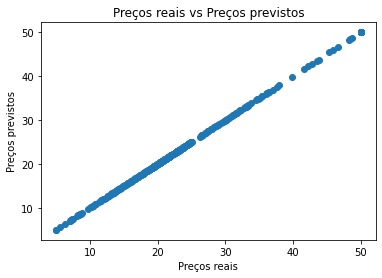

In [29]:
plt.scatter(Y_train, previsao_dados_treino)
plt.xlabel('Preços reais')
plt.ylabel('Preços previstos')
plt.title('Preços reais vs Preços previstos')
plt.show()

### Previsão dos dados de teste


In [26]:
# Precisão da previsão do modelo de teste

previsao_dados_teste = modelo.predict(X_test)

In [28]:
# Usando o R squared error para comparar a previsão de X_test do modelo com o Y_test
score_1 = metrics.r2_score(Y_test, previsao_dados_teste)

# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, previsao_dados_teste)

print(f'R squared error: {score_1}') # --> deve ser o mais próximo possível de 0 
print(f'Mean absolute error: {score_2}')

R squared error: 0.9113922141113195
Mean absolute error: 2.1665992802264644
